# EA Assignment 01 - Data Exploration
__Authored by: Álvaro Bartolomé del Canto (alvarobartt @ GitHub)__

---

In [ ]:
import glob

In [2]:
categories = glob.glob('../documents_challenge/*')
categories

['../documents_challenge/Wikipedia',
 '../documents_challenge/Conference_papers',
 '../documents_challenge/APR',
 '../documents_challenge/PAN11']

In [3]:
data = list()

In [4]:
%%time

for category in categories:
    source = category.split('/')[-1].lower()
    
    for subdir in glob.glob(f"{category}/*"):
        lang = subdir.split('/')[-1].lower()
        
        for file in glob.glob(f"{subdir}/*"):
            data.append({
                'lang': lang,
                'source': source,
                'text': open(file, 'r').read()
            })

CPU times: user 386 ms, sys: 136 ms, total: 521 ms
Wall time: 523 ms


In [5]:
import pandas as pd

data = pd.DataFrame(data)
data.head()

,lang,source,text
0,en,wikipedia,Watchmen is a twelve-issue comic book limite...
1,en,wikipedia,The Citigroup Center (formerly Citicorp Cente...
2,en,wikipedia,| birth_place = | death_date = | death_place ...
3,en,wikipedia,"Marbod or Maroboduus (born c. in 30 BC, died ..."
4,en,wikipedia,The Sylvester Medal is a bronze medal awarded ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23128 entries, 0 to 23127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lang    23128 non-null  object
 1   source  23128 non-null  object
 2   text    23128 non-null  object
dtypes: object(3)
memory usage: 542.2+ KB


In [7]:
data['source'].value_counts()

wikipedia            13588
apr                   6000
pan11                 2920
conference_papers      620
Name: source, dtype: int64

In [8]:
data['lang'].value_counts()

en    9724
fr    8236
es    5168
Name: lang, dtype: int64

In [17]:
data['text_lenght'] = data['text'].str.len()

In [18]:
data.head()

,lang,source,text,text_lenght
0,en,wikipedia,Watchmen is a twelve-issue comic book limite...,76020
1,en,wikipedia,The Citigroup Center (formerly Citicorp Cente...,7206
2,en,wikipedia,| birth_place = | death_date = | death_place ...,1655
3,en,wikipedia,"Marbod or Maroboduus (born c. in 30 BC, died ...",3099
4,en,wikipedia,The Sylvester Medal is a bronze medal awarded ...,1674


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

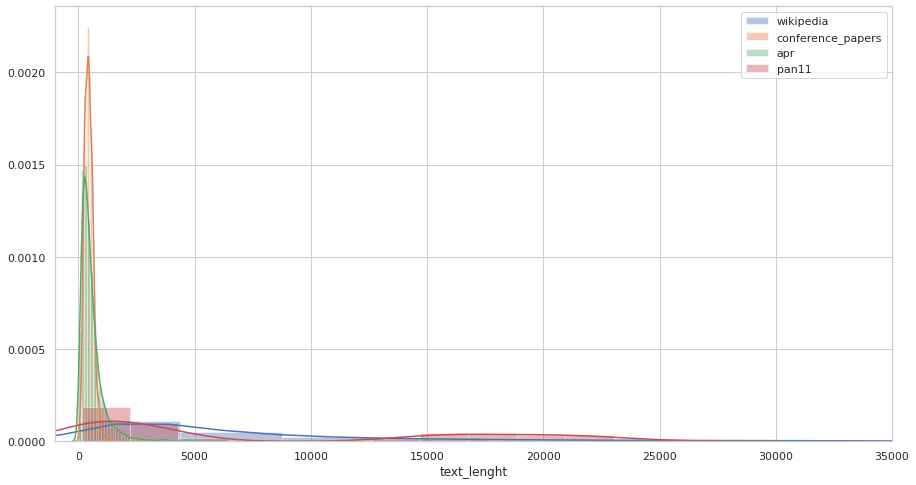

In [52]:
plt.figure(figsize=(15,8));
plt.xlim(-1000, 35000);

for source in data['source'].unique().tolist():
    sns.distplot(data.loc[data['source'] == source]['text_lenght'], label=source);

plt.legend();

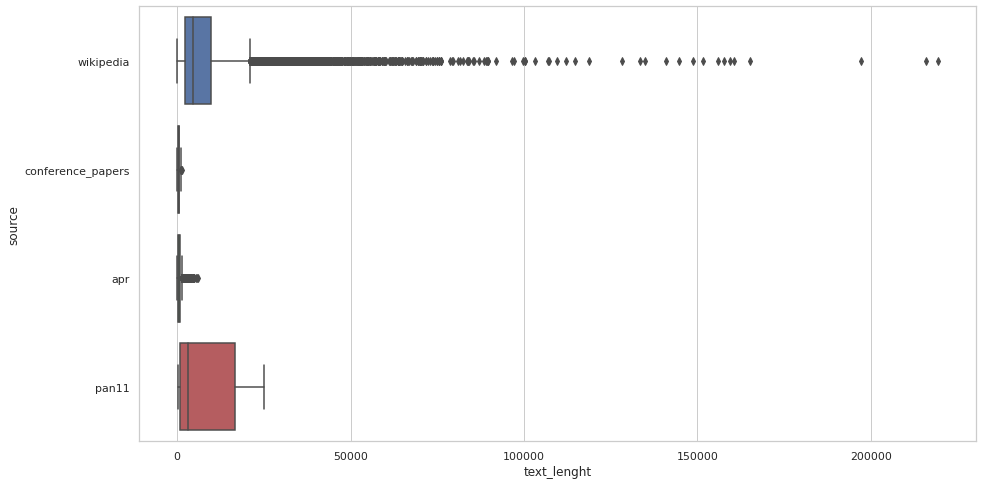

In [56]:
plt.figure(figsize=(15,8));
sns.boxplot(x="text_lenght", y="source", data=data);